## PART A
---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False) 


a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[0,1,10,75,500],[1,2,4,8,16]])
b = np.array([3,0,9,0,1])
x = np.linalg.solve(a, b)

print(x)

[ 3.00000000e+00 -4.26325641e-15 -2.13555556e+00  1.04622222e+00
 -1.14222222e-01]


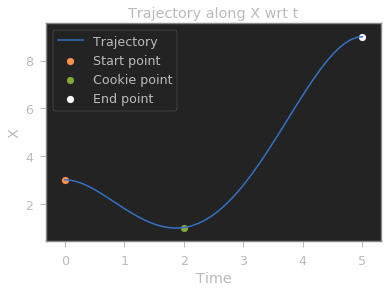

In [2]:
t = np.linspace(0, 5, num=50)
xt = x[0] + x[1]*(t) + x[2]*(t**2) + x[3]*(t**3) + x[4]*(t**4)
xa,ya = (3,0)#start point
xc,yc = (1,2.5)# cookie point
xb,yb = (9,5)# end point
t0 = 0
t2= 2
t5 = 5
plt.plot(t,xt,label='Trajectory')
plt.scatter(t0,xa,c='y',label = 'Start point')
plt.scatter(t2,xc,c='g',label = 'Cookie point')
plt.scatter(t5,xb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('X')
plt.title("Trajectory along X wrt t")
plt.legend()

In [3]:

a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[0,1,10,75,500],[1,2,4,8,16]])
b = np.array([0,0,5,0,2.5])
y = np.linalg.solve(a, b)

print(y)

[ 0.          0.          1.11388889 -0.28555556  0.02055556]


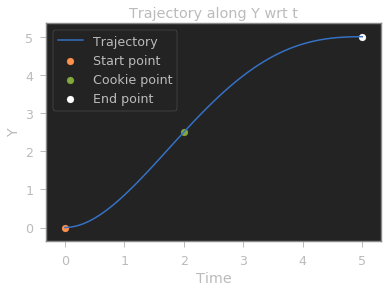

In [4]:
t = np.linspace(0, 5, num=50)
yt = y[0] + y[1]*(t) + y[2]*(t**2) + y[3]*(t**3) + y[4]*(t**4)
plt.plot(t,yt,label='Trajectory')
plt.scatter(t0,ya,c='y',label = 'Start point')
plt.scatter(t2,yc,c='g',label = 'Cookie point')
plt.scatter(t5,yb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title("Trajectory along Y wrt t")
plt.legend()

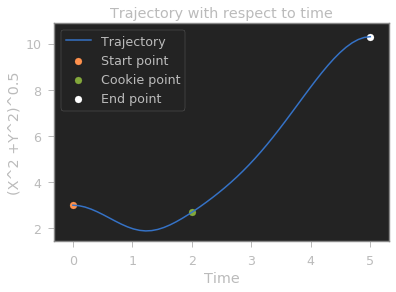

In [5]:
final = np.sqrt(xt**2 + yt**2)
p1 = np.sqrt(xa**2 + ya**2)
p2 = np.sqrt(xc**2 + yc**2)
p3 = np.sqrt(xb**2 + yb**2)
plt.plot(t,final,label='Trajectory')
plt.scatter(t0,p1,c='y',label = 'Start point')
plt.scatter(t2,p2,c='g',label = 'Cookie point')
plt.scatter(t5,p3,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('(X^2 +Y^2)^0.5')
plt.title("Trajectory with respect to time")
plt.legend()

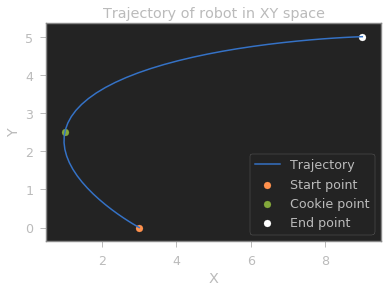

In [6]:
plt.plot(xt,yt,label='Trajectory')
plt.scatter(xa,ya,c='y',label = 'Start point')
plt.scatter(xc,yc,c='g',label = 'Cookie point')
plt.scatter(xb,yb,c='w',label = 'End point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectory of robot in XY space")
plt.legend()

Text(0.5, 1.0, 'Velocity profile along X')

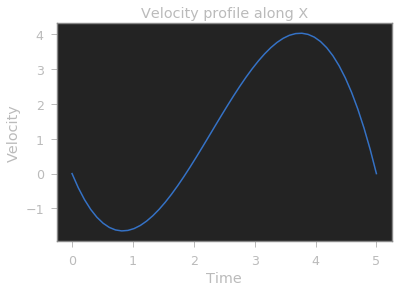

In [7]:
# velocity profiles

velx = x[1] + 2*x[2]*(t) + 3*x[3]*(t**2) + 4*x[4]*(t**3)
vely = y[1] + 2*y[2]*(t) + 3*y[3]*(t**2) + 4*y[4]*(t**3)

plt.plot(t,velx)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity profile along X")

Text(0.5, 1.0, 'Velocity profile along Y')

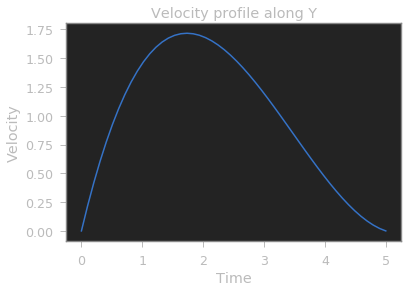

In [8]:
plt.plot(t,vely)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity profile along Y")

Text(0.5, 1.0, 'Velocity Profile')

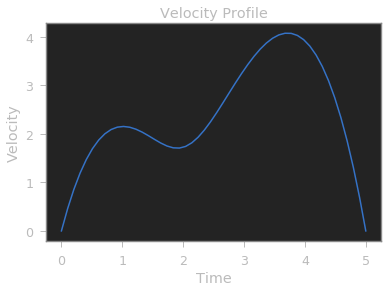

In [9]:
vel = np.sqrt(velx**2 +vely**2)
plt.plot(t,vel)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Profile')


Text(0.5, 1.0, 'Acceleration profile along X')

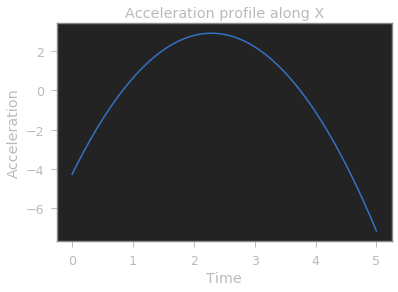

In [10]:
# acceleration profiles

accx = 2*x[2] + 6*x[3]*(t) + 12*x[4]*(t**2)
accy = 2*y[2] + 6*y[3]*(t) + 12*y[4]*(t**2)

plt.plot(t,accx)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration profile along X")

Text(0.5, 1.0, 'Acceleration profile along Y')

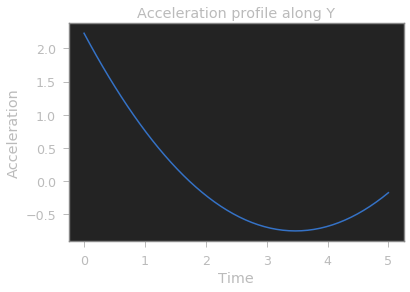

In [11]:
plt.plot(t,accy)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration profile along Y")

Text(0.5, 1.0, 'Acceleration Profile')

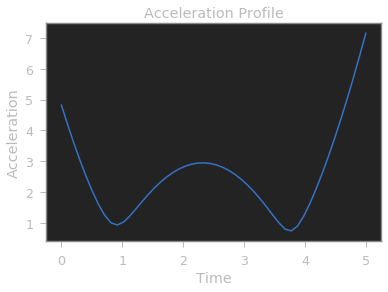

In [12]:
acc = np.sqrt(accx**2 +accy**2)
plt.plot(t,acc)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration Profile')


## PART B
---

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False) 



In [14]:
a = np.array([[0.2592,0.3456,0.2304,0.0768],[1,0,0,0],[0,0,0,-1],[0.4752,-0.1728,-0.1710,0.1792]])
b = np.array([0.14112,3,-9,-0.6192])

x = np.linalg.solve(a, b)
W = np.zeros([6])
W[0] = 3
W[1] =x[0]
W[2] = x[1]
W[3] =x[2]
W[4] = x[3]
W[5] =9

print(W)

[  3.           3.         -55.47177419  77.44516129   9.
   9.        ]


In [15]:
def bernstein_poly(n, i, t):
    
    return scipy.special.comb(n, i) * (t/5) ** i * (1 - (t/5)) ** (n - i)

In [16]:
import scipy
k=0
B = np.zeros([6,50])
for j in t:
    for i in range(6):
        B[i,k] = bernstein_poly(5,i,j)*W[i]
    k = k+1


(50,)


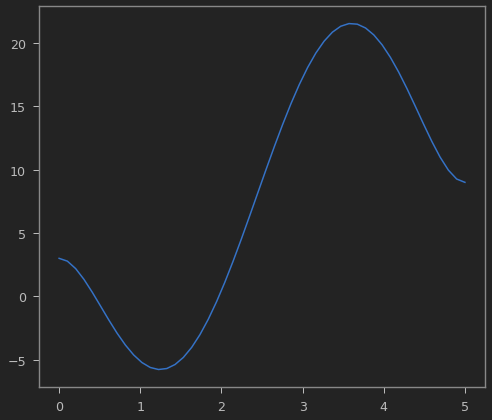

In [17]:
#print(B)
fin1 =np.sum(B, axis=0)
print(fin1.shape)
plt.plot(t,fin1)

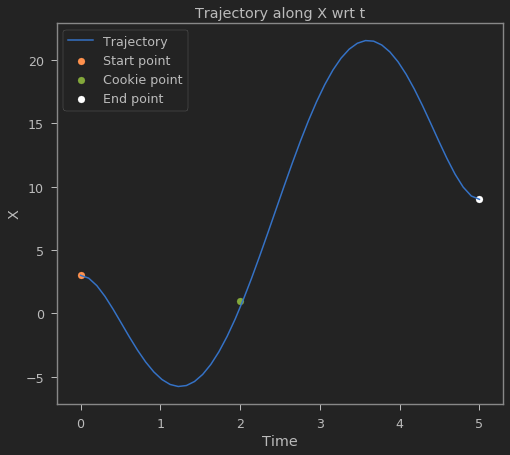

In [18]:
plt.plot(t,fin1,label='Trajectory')
plt.scatter(t0,xa,c='y',label = 'Start point')
plt.scatter(t2,xc,c='g',label = 'Cookie point')
plt.scatter(t5,xb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('X')
plt.title("Trajectory along X wrt t")
plt.legend()

In [19]:
def bernstein_der(n, i, t):
    """
    Bernstein polynom.
    :param n: (int) polynom degree 
    :param i: (int)
    :param t: (float)
    :return: (float)
    """
    return scipy.special.comb(n, i) * i*(t/5) ** (i-1) * (1 - (t/5)) ** (n - i) - scipy.special.comb(n, i) * (t/5) ** (i) * (n-i)*(1 - (t/5)) ** (n - i-1)

In [20]:
import scipy
k=0
B = np.zeros([6,50])
for j in t:
    for i in range(6):
        B[i,k] = bernstein_der(5,i,j)*W[i]
    k = k+1

/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, 'Velocity profile along X')

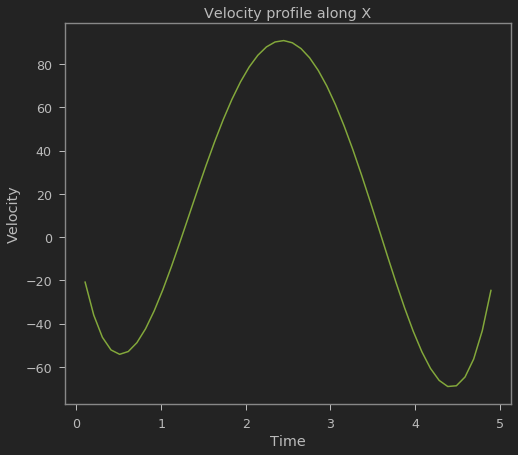

In [21]:
velx =np.sum(B, axis=0)


plt.plot(t,velx,c='g')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity profile along X")

In [22]:
def bernstein_double_der(n, i, t):
    """
    Bernstein polynom.
    :param n: (int) polynom degree 
    :param i: (int)
    :param t: (float)
    :return: (float)
    """
    return scipy.special.comb(n, i) * i*(t/5) ** (i-1) * (n - i)*(1 - (t/5)) ** (n - i-1)+scipy.special.comb(n, i) * i*(i-1)*(t/5) ** (i-2) * (1 - (t/5)) ** (n - i) + scipy.special.comb(n, i) * (t/5) ** (i) * (n-i)*(n-i-1)*(1 - (t/5)) ** (n - i-2) - scipy.special.comb(n, i) * i*(t/5) ** (i-1) * (n-i)*(1 - (t/5)) ** (n - i-1)

In [23]:
import scipy
k=0
B = np.zeros([6,50])
for j in t:
    for i in range(6):
        B[i,k] = bernstein_double_der(5,i,j)*W[i]
    k = k+1

/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, 'Acceleration profile along X')

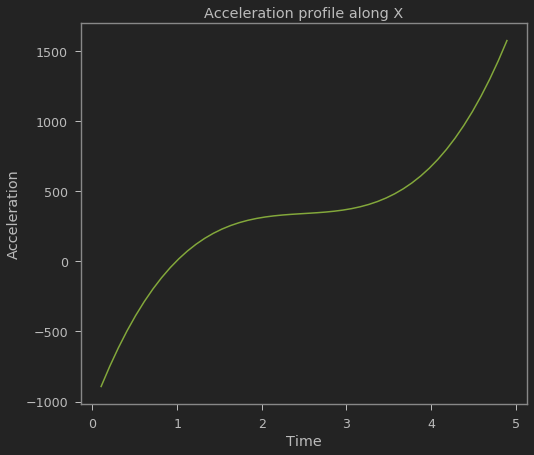

In [24]:
accx =np.sum(B, axis=0)


plt.plot(t,accx,c='g')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration profile along X")

In [25]:
a = np.array([[0.2592,0.3456,0.2304,0.0768],[1,0,0,0],[0,0,0,-1],[0.4752,-0.1728,-0.1710,0.1792]])
b = np.array([2.4488,0.128,-5,0.128])

y = np.linalg.solve(a, b)
print(x)
W[0] = 0
W[1] =y[0]
W[2] = y[1]
W[3] =y[2]
W[4] = y[3]
W[5] =5

print(W)
W = [0, 0.128,       8.11253465, -3.35099642,  5.,5       ]

[  3.         -55.47177419  77.44516129   9.        ]
[ 0.          0.128       8.11253465 -3.35099642  5.          5.        ]


(50,)


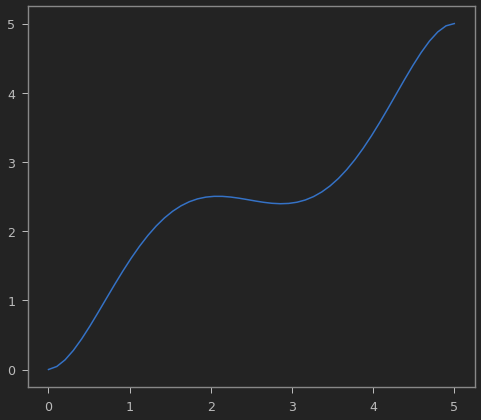

In [26]:
k=0
B = np.zeros([6,50])
for j in t:
    for i in range(6):
        B[i,k] = bernstein_poly(5,i,j)*W[i]
    k = k+1
fin2 =np.sum(B, axis=0)
print(fin2.shape)
plt.plot(t,fin2)

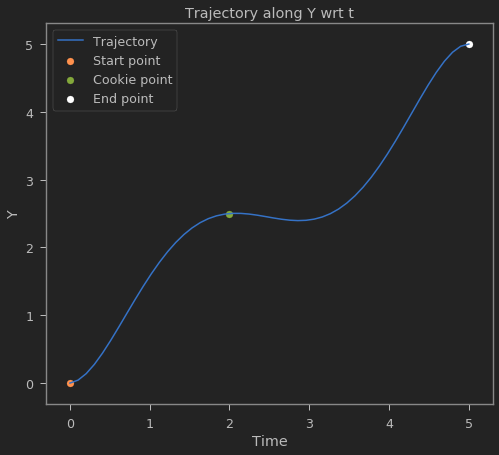

In [27]:
plt.plot(t,fin2,label='Trajectory')
plt.scatter(t0,ya,c='y',label = 'Start point')
plt.scatter(t2,yc,c='g',label = 'Cookie point')
plt.scatter(t5,yb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title("Trajectory along Y wrt t")
plt.legend()

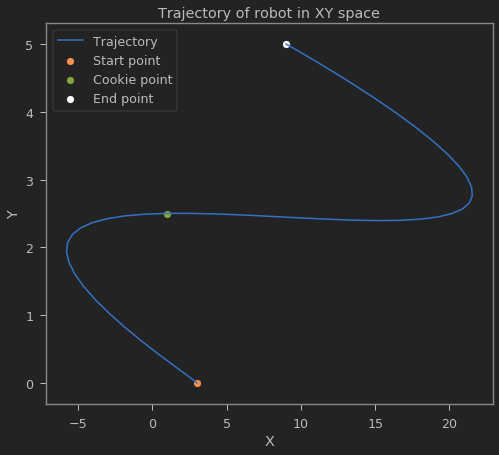

In [28]:
plt.plot(fin1,fin2,label='Trajectory')
plt.scatter(xa,ya,c='y',label = 'Start point')
plt.scatter(xc,yc,c='g',label = 'Cookie point')
plt.scatter(xb,yb,c='w',label = 'End point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectory of robot in XY space")
plt.legend()

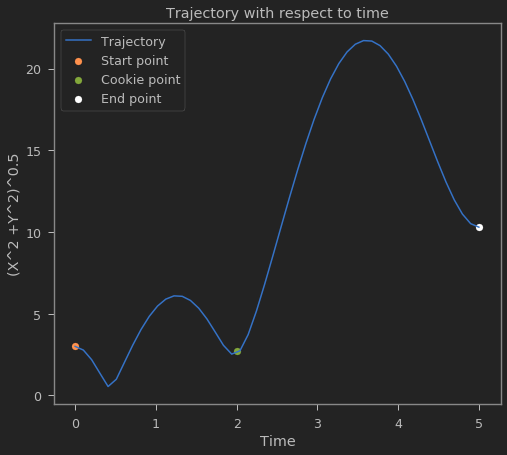

In [29]:
fin = np.sqrt(fin1**2 + fin2**2)

p1 = np.sqrt(xa**2 + ya**2)
p2 = np.sqrt(xc**2 + yc**2)
p3 = np.sqrt(xb**2 + yb**2)

plt.scatter(t0,p1,c='y',label = 'Start point')
plt.scatter(t2,p2,c='g',label = 'Cookie point')
plt.scatter(t5,p3,c='w',label = 'End point')
plt.plot(t,fin,label='Trajectory')
plt.xlabel('Time')
plt.ylabel('(X^2 +Y^2)^0.5')
plt.title("Trajectory with respect to time")
plt.legend()

In [30]:
import scipy
k=0
B = np.zeros([6,50])
for j in t:
    for i in range(6):
        B[i,k] = bernstein_der(5,i,j)*W[i]
    k = k+1

/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, 'Velocity profile along Y')

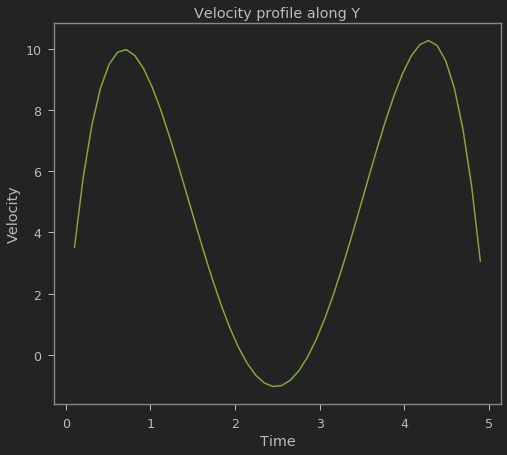

In [31]:
vely =np.sum(B, axis=0)


plt.plot(t,vely,c='g')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity profile along Y")

/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/home/nive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, 'Acceleration profile along Y')

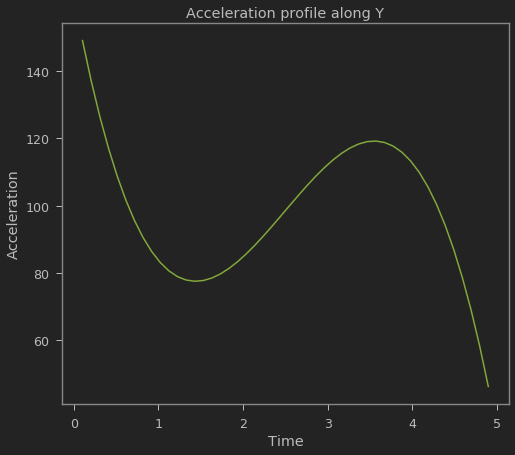

In [32]:
import scipy
k=0
B = np.zeros([6,50])
for j in t:
    for i in range(6):
        B[i,k] = bernstein_double_der(5,i,j)*W[i]
    k = k+1
accy =np.sum(B, axis=0)


plt.plot(t,accy,c='g')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration profile along Y")

Text(0.5, 1.0, 'Velocity Profile')

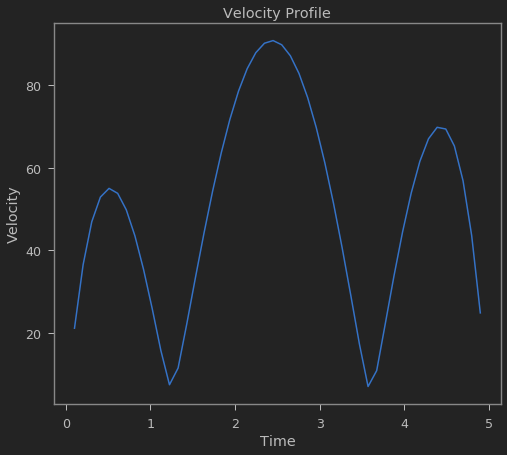

In [33]:
vel = np.sqrt(velx**2 +vely**2)
plt.plot(t,vel)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Profile')

Text(0.5, 1.0, 'Acceleration Profile')

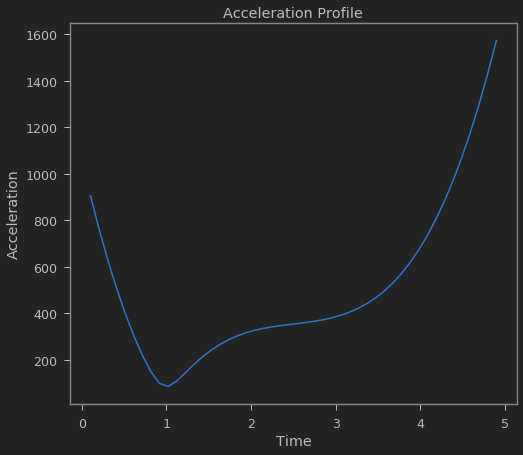

In [34]:
acc = np.sqrt(accx**2 +accy**2)
plt.plot(t,acc)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration Profile')
